In [1]:
# Import required libraries
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt


# title (MLEM for CT) 
"""
Description of Steps:

Generate True Object: Start with the Shepp-Logan Phantom as a test image, rescaled for computational simplicity.
Generate Sinogram: Simulate projection data using the Radon transform.
Initialize Reconstruction: Start with an initial guess and calculate the sensitivity image.
Iterative Reconstruction: Perform MLEM updates iteratively to improve the reconstruction.
Display Results: Visualize intermediate and final reconstruction images.
"""

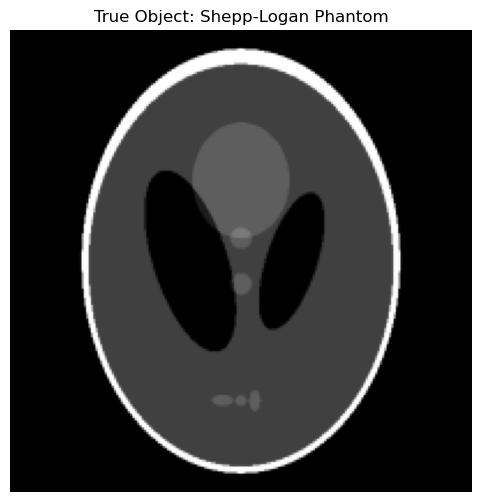

In [2]:
"""
Step 1: Generate the Shepp-Logan Phantom
This phantom is a commonly used test image for reconstruction algorithms.
"""
activity_level = 0.1  # Control for radioactive concentration (optional)
true_object = shepp_logan_phantom()
true_object = rescale(activity_level * true_object, 0.5)  # Resize for computational efficiency

# Display the true object
plt.figure(figsize=(6, 6))
plt.imshow(true_object, cmap='Greys_r')
plt.title("True Object: Shepp-Logan Phantom")
plt.axis('off')
plt.show()

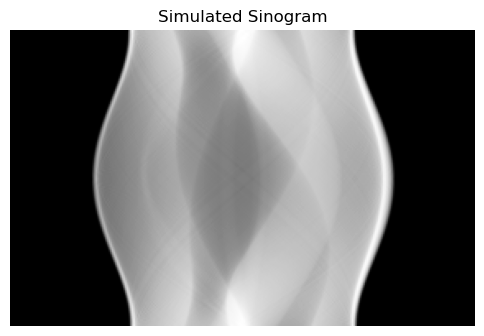

In [3]:
"""
Step 2: Generate Simulated Sinogram Data
Using the Radon transform, we simulate projection data at evenly spaced angles.
"""
azi_angles = np.linspace(0.0, 180.0, 180, endpoint=False)  # 180 angles from 0 to 180 degrees
sinogram = radon(true_object, azi_angles, circle=False)  # Forward projection

# Display the sinogram
plt.figure(figsize=(6, 6))
plt.imshow(sinogram.T, cmap='Greys_r')
plt.title("Simulated Sinogram")
plt.axis('off')
plt.show()

In [4]:
"""
Step 3: Initialize MLEM Reconstruction
Set the initial guess for the image and calculate sensitivity image.
"""

mlem_recon = np.ones(true_object.shape)  # Initial guess (all pixels set to 1)
sino_ones = np.ones(sinogram.shape)  # Used to calculate sensitivity
sens_image = iradon(sino_ones, azi_angles, circle=False, filter_name=None)

In [5]:
"""
Step 4: Perform Iterative Reconstruction
MLEM iteratively updates the reconstructed image based on projection ratios.
"""

iterations = 200  # Adjust the number of iterations for a balance of speed and accuracy

for iter in range(iterations):
    # Forward projection of current reconstruction
    fp = radon(mlem_recon, azi_angles, circle=False)

    # Ratio of measured sinogram to forward projection (avoiding division by zero)
    ratio = sinogram / (fp + 1e-6)
    
    # Back-projection of the ratio, normalized by the sensitivity image
    correction = iradon(ratio, azi_angles, circle=False, filter_name=None) / sens_image
    
    # Update the reconstructed image
    mlem_recon *= correction   

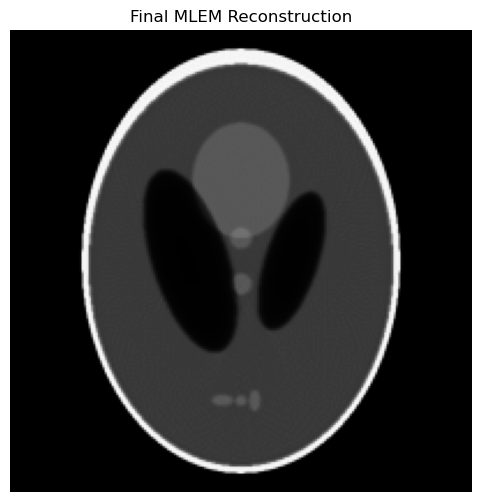

In [6]:
"""
Step 5: Display Final Reconstruction
"""

plt.figure(figsize=(6, 6))
plt.imshow(mlem_recon, cmap='Greys_r')
plt.title("Final MLEM Reconstruction")
plt.axis('off')
plt.show()